In [ ]:
!pip install pandas matplotlib seaborn dash plotly


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

In [3]:
# Load data from the provided URL
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
data = pd.read_csv(data_url)
data.head(5)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
# Convert Date Column to datetime format if necessary
data['Year'] = pd.to_datetime(data['Year']).dt.year

In [5]:
print(data.columns)

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')


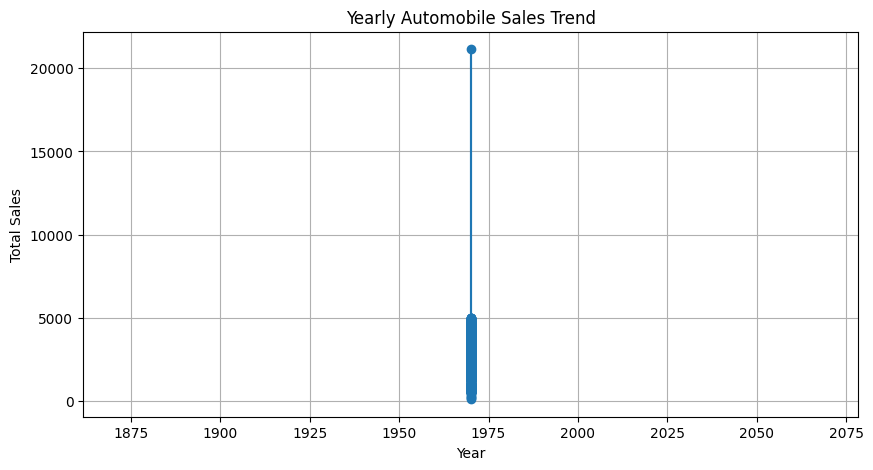

In [6]:
# TASK 1.1: Line chart for automobile sales fluctuations over years
plt.figure(figsize=(10, 5))
plt.plot(data['Year'], data['Automobile_Sales'], marker='o', linestyle='-')
plt.title('Yearly Automobile Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

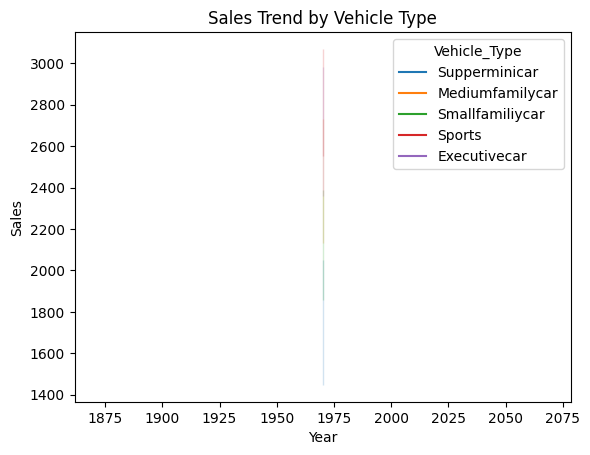

In [7]:
# TASK 1.2: Line chart for different vehicle types during recession
sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', data=data)
plt.title('Sales Trend by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

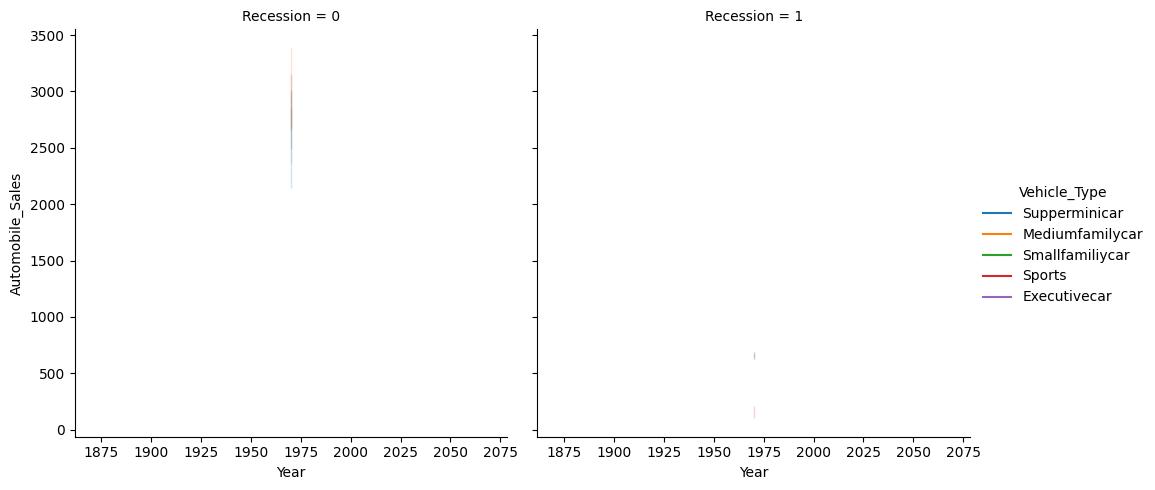

In [8]:
# TASK 1.3: Seaborn visualization comparing recession vs non-recession sales trend
sns.relplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', col='Recession', data=data, kind='line')
plt.show()

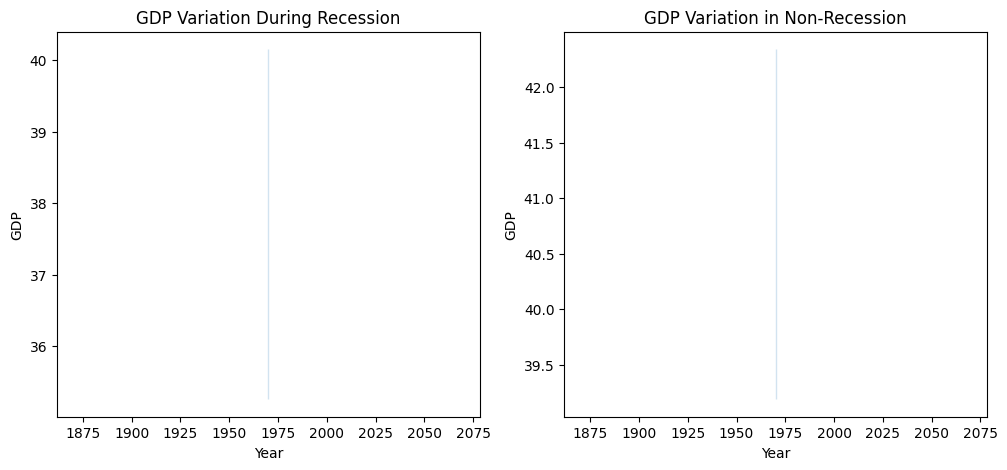

In [9]:
# TASK 1.4: Subplots for GDP variations in recession vs non-recession
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(x='Year', y='GDP', data=data[data['Recession'] == 1], ax=ax[0])
ax[0].set_title('GDP Variation During Recession')
sns.lineplot(x='Year', y='GDP', data=data[data['Recession'] == 0], ax=ax[1])
ax[1].set_title('GDP Variation in Non-Recession')
plt.show()

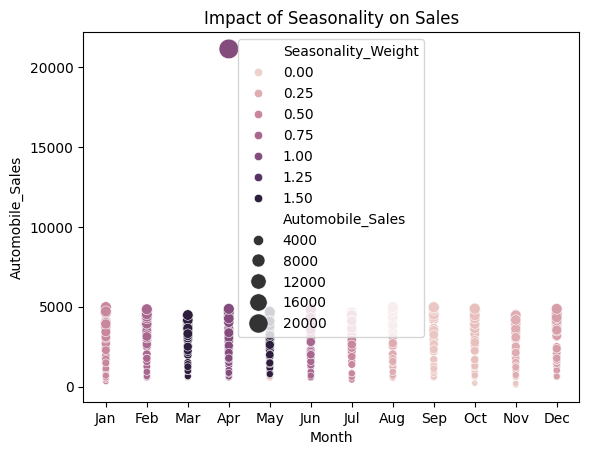

In [10]:
# TASK 1.5: Bubble plot for seasonality impact
sns.scatterplot(x='Month', y='Automobile_Sales', size='Automobile_Sales', hue='Seasonality_Weight', data=data, sizes=(20, 200))
plt.title('Impact of Seasonality on Sales')
plt.show()

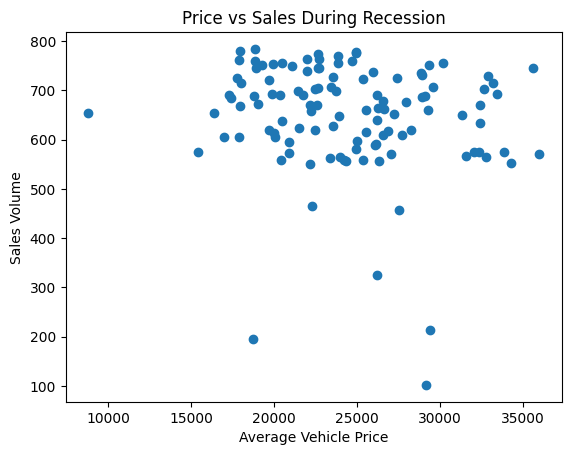

In [11]:
# TASK 1.6: Scatter plot for price vs sales correlation in recession
plt.scatter(data[data['Recession'] == 1]['Price'], data[data['Recession'] == 1]['Automobile_Sales'])
plt.title('Price vs Sales During Recession')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume')
plt.show()

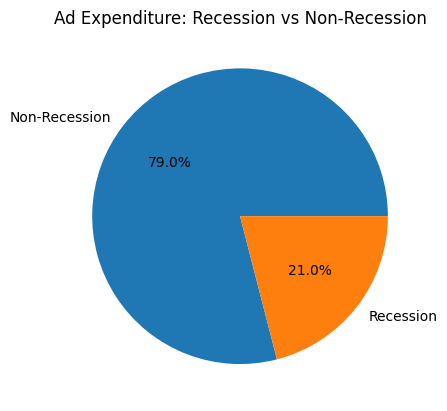

In [12]:
# TASK 1.7: Pie chart for Advertisement expenditure during recession and non-recession periods
plt.figure()
plt.pie(data.groupby('Recession')['Advertising_Expenditure'].sum(), labels=['Non-Recession', 'Recession'], autopct='%1.1f%%')
plt.title('Ad Expenditure: Recession vs Non-Recession')
plt.show()

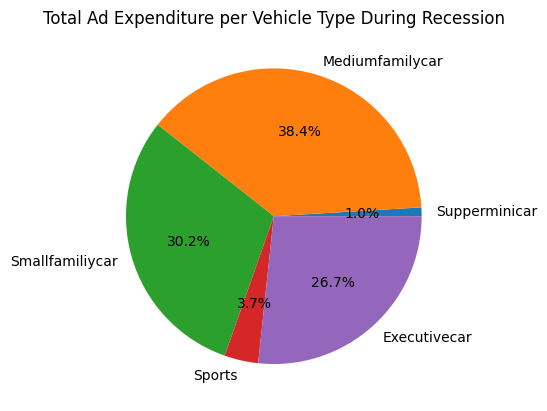

In [13]:
# TASK 1.8: Pie chart for total Advertisement expenditure for each vehicle type during recession
plt.figure()
plt.pie(data[data['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum(), labels=data['Vehicle_Type'].unique(), autopct='%1.1f%%')
plt.title('Total Ad Expenditure per Vehicle Type During Recession')
plt.show()

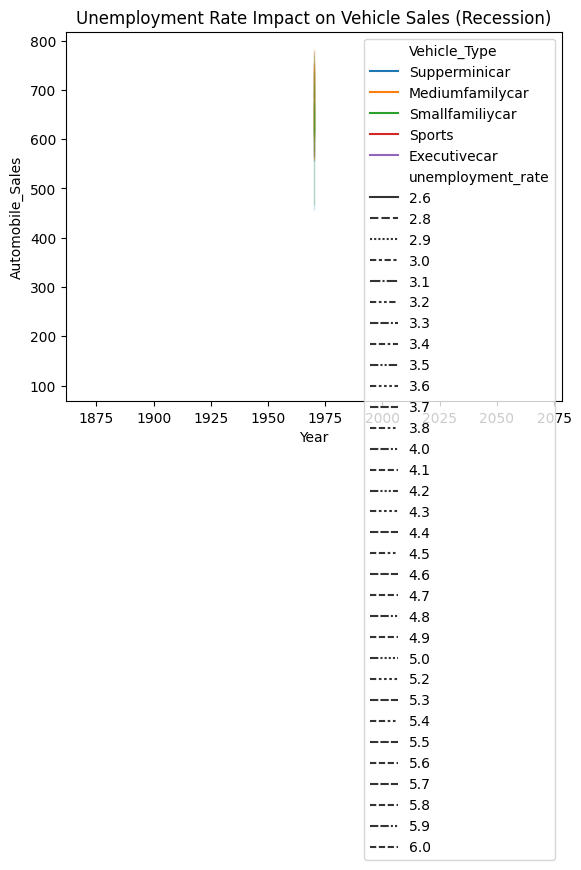

In [14]:
# TASK 1.9: Line plot for unemployment rate effect on sales
sns.lineplot(x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='unemployment_rate', data=data[data['Recession'] == 1])
plt.title('Unemployment Rate Impact on Vehicle Sales (Recession)')
plt.show()

In [15]:
# TASK 2.1: Create a Dash application and give it a meaningful title
app = dash.Dash(__name__)
app.title = "Automobile Sales Dashboard"

In [16]:
# TASK 2.2: Add drop-downs to your dashboard with appropriate titles and options
dropdown = dcc.Dropdown(
    id='vehicle-type',
    options=[{'label': vt, 'value': vt} for vt in data['Vehicle_Type'].unique()],
    value=data['Vehicle_Type'].unique()[0],
    placeholder='Select Vehicle Type'
)

In [17]:
# TASK 2.3: Add a division for output display with appropriate 'id' and 'classname' property
output_div = html.Div(id='output-container')

In [18]:
# TASK 2.5 & TASK 2.6: Graph components for reports
graph_recession = dcc.Graph(id='recession-report')
graph_yearly = dcc.Graph(id='yearly-report')

In [19]:
# Define Layout (All elements inside layout at once)
app.layout = html.Div([
    html.H1("Automobile Sales Dashboard"),
    dropdown,
    output_div,
    graph_recession,
    graph_yearly
])

In [20]:
# TASK 2.4: Callback for dropdown selection display
@app.callback(
    Output('output-container', 'children'),
    Input('vehicle-type', 'value')
)
def update_output(selected_vehicle):
    return f'You have selected: {selected_vehicle}'

In [21]:
# TASK 2.5: Callback for Recession Report Statistics
@app.callback(
    Output('recession-report', 'figure'),
    Input('vehicle-type', 'value')
)
def update_recession_graph(selected_vehicle):
    df_filtered = data[data['Vehicle_Type'] == selected_vehicle]
    fig = px.line(df_filtered, x='Year', y='Automobile_Sales', title=f'Sales Trend for {selected_vehicle}')
    return fig

In [22]:
# TASK 2.6: Callback for Yearly Report Statistics
@app.callback(
    Output('yearly-report', 'figure'),
    Input('vehicle-type', 'value')
)
def update_yearly_graph(selected_vehicle):
    df_filtered = data[data['Vehicle_Type'] == selected_vehicle]
    fig = px.bar(df_filtered, x='Year', y='GDP', title=f'Yearly GDP Trend for {selected_vehicle}')
    return fig

if __name__ == '__main__':
    app.run(debug=True)
